In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import inspect

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')


## Мета цього довідника

### 1. Отримати повний інвентар інструментів
Ви прагнете бачити всі доступні компоненти, а не покладатися лише на приклади з інтернету чи туторіали. Це дозволяє:
- не обмежуватись стандартними прикладами (`Conv2D`, `Dense`);
- виявляти рідкісні або нові шари (наприклад, `DepthwiseConv2D`, `SeparableConv2D`, `StochasticDepth`);
- не пропустити корисні речі для нестандартних задач.

### 2. Створити власний "Reference Sheet"
Ви можете структуровано описати всі шари, втрати, оптимізатори тощо, сформувавши для себе особистий **довідник** або **шаблон для архітектури моделей**.

### 3. Розуміти весь "алфавіт" TensorFlow Keras
Щоб створювати кастомні архітектури, потрібно знати, які “букви” є у мові фреймворку. Ви таким чином вивчаєте "лексикон" TensorFlow.

### 4. Бути готовим до будь-якої задачі
Коли перед вами стоїть нова задача (наприклад, anomaly detection, segmentation, multi-task learning), ви вже знаєте, які шари, втрати й оптимізатори краще підійдуть.
Не потрібно шукати статті — ви бачите список і обираєте те, що відповідає структурі задачі.

---

## Глобальна мета
➡ **Стати архітектором моделей**, який:
- конструює їх свідомо;
- обирає компоненти, виходячи з їх властивостей, а не модних трендів;
- і може гнучко комбінувати їх під конкретні вимоги проєкту.


## Категорії шарів tf.keras.layers

| Категорія                  | Призначення                                                        | Основні приклади шарів                                      | Коли використовують                                              | Аналогія                                                    |
|-----------------------------|---------------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|
| Convolutional                | Виявлення локальних патернів у даних                             | Conv1D, Conv2D, Conv3D, SeparableConv2D, DepthwiseConv2D   | При роботі із зображеннями, відео, послідовностями              | Рухоме вікно, що шукає структури                            |
| Pooling                      | Зменшення розмірності та виділення найважливіших ознак          | MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D          | Зменшення обчислень та узагальнення ознак                        | Витяг головних деталей із великого набору                   |
| Normalization                | Стабілізація та прискорення навчання                             | BatchNormalization, LayerNormalization                      | Для пришвидшення та стабілізації градієнтів                      | Вирівнювання рівня сигналу                                  |
| Activation                   | Додавання нелінійності                                           | ReLU, LeakyReLU, Softmax, Sigmoid, Tanh                     | Щоб мережа могла моделювати складні залежності                  | Фільтри, які підсилюють чи обмежують сигнали                |
| Regularization / Noise       | Захист від перенавчання, додавання шуму                          | Dropout, SpatialDropout2D, GaussianNoise                    | Щоб уникнути перенавчання та підвищити стійкість моделі         | Штучне ускладнення для підготовки до реальних ситуацій     |
| Shape / Reshape              | Зміна форми або порядку даних                                    | Flatten, Reshape, Permute, RepeatVector                     | Коли потрібно підготувати дані для інших типів шарів             | Складання або розкладання елементів                         |
| Core                         | Базові побудовчі блоки                                           | Dense, Embedding, Lambda                                    | Загальні задачі класифікації, регресії, перетворення            | Головні будівельні блоки                                   |
| Recurrent                    | Обробка послідовностей                                          | LSTM, GRU, SimpleRNN, ConvLSTM2D                           | Для тексту, часових рядів, послідовностей подій                  | Кільцева пам’ять                                            |
| Merge / Math                 | Об’єднання та математичні операції                               | Add, Multiply, Concatenate, Average                          | Коли потрібно поєднати кілька потоків даних                      | Складання кількох потоків у один                           |
| Attention                    | Механізми уваги                                                  | Attention, MultiHeadAttention, AdditiveAttention            | Коли потрібно фокусуватись на важливих частинах даних            | Схоже на вибір важливих частин у книзі                     |
| Spatial / Transformation     | Просторові трансформації та зміни розмірності                   | UpSampling2D, ZeroPadding2D, Cropping2D                     | Під час масштабування або обрізання зображень                    | Розтягування або обрізання фото                             |
| Utilities / Service          | Допоміжні шари, службові функції                                 | InputLayer, Masking, Lambda, ActivityRegularization         | Для коректної роботи інших компонентів                           | Службові компоненти, що допомагають організувати дані      |


In [ ]:
layers_list = dir(tf.keras.layers)

layer_classes = [
    name for name in layers_list
    if inspect.isclass(getattr(tf.keras.layers, name))
    and issubclass(getattr(tf.keras.layers, name), tf.keras.layers.Layer)
]
print(f'=== All layers ({len(layer_classes)}) ===:')
for index, cls in enumerate(sorted(layer_classes)):
    print(f'{index}. {cls}')


=== All layers (157) ===:
0. Activation
1. ActivityRegularization
2. Add
3. AdditiveAttention
4. AlphaDropout
5. Attention
6. AugMix
7. AutoContrast
8. Average
9. AveragePooling1D
10. AveragePooling2D
11. AveragePooling3D
12. AvgPool1D
13. AvgPool2D
14. AvgPool3D
15. BatchNormalization
16. Bidirectional
17. CategoryEncoding
18. CenterCrop
19. Concatenate
20. Conv1D
21. Conv1DTranspose
22. Conv2D
23. Conv2DTranspose
24. Conv3D
25. Conv3DTranspose
26. ConvLSTM1D
27. ConvLSTM2D
28. ConvLSTM3D
29. Convolution1D
30. Convolution1DTranspose
31. Convolution2D
32. Convolution2DTranspose
33. Convolution3D
34. Convolution3DTranspose
35. Cropping1D
36. Cropping2D
37. Cropping3D
38. CutMix
39. Dense
40. DepthwiseConv1D
41. DepthwiseConv2D
42. Discretization
43. Dot
44. Dropout
45. ELU
46. EinsumDense
47. Embedding
48. Equalization
49. Flatten
50. FlaxLayer
51. GRU
52. GRUCell
53. GaussianDropout
54. GaussianNoise
55. GlobalAveragePooling1D
56. GlobalAveragePooling2D
57. GlobalAveragePooling3D
58. G


###  Convolutional Layers

| Шар                        | Імпорт                               | Призначення                                       | Основні параметри                                             | Коли використовують                                         | Аналогія                                            |
|-----------------------------|--------------------------------------|--------------------------------------------------|---------------------------------------------------------------|-------------------------------------------------------------|----------------------------------------------------|
| Conv1D                      | tf.keras.layers.Conv1D               | Згортка 1D для послідовностей                    | filters, kernel_size, strides, padding, activation            | Обробка сигналів, текстових послідовностей                 | Рухоме вікно по звуковій доріжці                   |
| Conv2D                      | tf.keras.layers.Conv2D               | Основна 2D-згортка для зображень                 | filters, kernel_size, strides, padding, activation            | Виявлення країв, текстур, локальних патернів на фото       | Сканування фото штампом                             |
| Conv3D                      | tf.keras.layers.Conv3D               | Згортка для 3D-даних                             | filters, kernel_size, strides, padding, activation            | Аналіз відео, медичних знімків                             | Аналіз об’ємних блоків                              |
| SeparableConv2D             | tf.keras.layers.SeparableConv2D      | Розділена згортка: окремо по каналах, потім 1×1 | filters, kernel_size, strides, padding, activation            | Оптимізація для мобільних та легких моделей (MobileNet)    | Спочатку обробка каналів окремо, потім їх злиття   |
| DepthwiseConv2D             | tf.keras.layers.DepthwiseConv2D      | Згортка окремо по кожному каналу                 | kernel_size, strides, padding, activation                     | Економія параметрів у CNN                                  | Незалежний аналіз кожного каналу зображення        |
| Conv2DTranspose             | tf.keras.layers.Conv2DTranspose      | Зворотна згортка (upsampling)                    | filters, kernel_size, strides, padding, activation            | Генерація зображень, сегментація, автоенкодери             | Збільшення розміру картинки назад                   |
| Conv3DTranspose             | tf.keras.layers.Conv3DTranspose      | Зворотна 3D-згортка                              | filters, kernel_size, strides, padding, activation            | Відновлення обʼємних структур, 3D-декодери                 | Збільшення розмірності 3D об’єкта                  |
| SeparableConv1D             | tf.keras.layers.SeparableConv1D      | Розділена 1D-згортка                             | filters, kernel_size, strides, padding, activation            | Легка обробка сигналів                                     | Розділення обробки сигналу по каналам               |
| Conv1DTranspose *(немає)*   | -                                    | (відсутній у tf.keras, можна імітувати Upsampling+Conv1D) | -                                                           | Можна замінити на Upsampling1D + Conv1D                   | -                                                    |


### 🏞️ Pooling Layers

| Шар                      | Імпорт                       | Призначення                                     | Основні параметри                             | Коли використовують                          | Аналогія                                               |
|---------------------------|------------------------------|------------------------------------------------|-----------------------------------------------|-----------------------------------------------|--------------------------------------------------------|
| MaxPooling1D              | tf.keras.layers.MaxPooling1D | Вибір максимуму в 1D вікні                      | pool_size, strides, padding                   | Зменшення розмірності послідовних даних       | Вибирати найкраще з групи                              |
| MaxPooling2D              | tf.keras.layers.MaxPooling2D | Вибір максимуму в 2D вікні                      | pool_size, strides, padding                   | Зменшення розмірності зображень               | Вибирати найяскравіший піксель у блоці                 |
| MaxPooling3D              | tf.keras.layers.MaxPooling3D | Вибір максимуму в 3D вікні                      | pool_size, strides, padding                   | Зменшення розмірності об’ємних даних           | Вибирати найсильніший сигнал у 3D-блоці                 |
| AveragePooling1D          | tf.keras.layers.AveragePooling1D | Усереднення в 1D вікні                       | pool_size, strides, padding                   | Зменшення розмірності послідовностей з усередненням | Середнє значення замість максимуму                    |
| AveragePooling2D          | tf.keras.layers.AveragePooling2D | Усереднення в 2D вікні                       | pool_size, strides, padding                   | Зменшення розмірності зображень з усередненням | Середнє значення в блоці                               |
| AveragePooling3D          | tf.keras.layers.AveragePooling3D | Усереднення в 3D вікні                       | pool_size, strides, padding                   | Зменшення розмірності об’ємних даних           | Середнє значення у 3D-блоці                            |
| GlobalMaxPooling1D        | tf.keras.layers.GlobalMaxPooling1D | Вибір максимуму по всій послідовності     | —                                             | Коли потрібно отримати головну ознаку послідовності | Вибрати найбільше значення у всьому наборі            |
| GlobalMaxPooling2D        | tf.keras.layers.GlobalMaxPooling2D | Вибір максимуму по всій карті ознак       | —                                             | Компактний опис ознак зображення               | Вибрати найяскравіший піксель на всій карті           |
| GlobalMaxPooling3D        | tf.keras.layers.GlobalMaxPooling3D | Вибір максимуму по об’ємних ознаках       | —                                             | Для об’ємних даних                             | Найсильніший сигнал у всьому 3D-блоці                  |
| GlobalAveragePooling1D    | tf.keras.layers.GlobalAveragePooling1D | Усереднення по всій послідовності        | —                                             | Компактний опис послідовності                    | Середнє значення по всьому набору                      |
| GlobalAveragePooling2D    | tf.keras.layers.GlobalAveragePooling2D | Усереднення по всій карті ознак          | —                                             | Зменшення розмірності зображень                   | Середнє по всіх пікселях карти                         |
| GlobalAveragePooling3D    | tf.keras.layers.GlobalAveragePooling3D | Усереднення по об’ємних ознаках          | —                                             | Зменшення розмірності об’ємних даних           | Середнє по всьому 3D-блоку                             |


### ⚖️ Normalization Layers

| Шар                      | Імпорт                          | Призначення                                            | Основні параметри                           | Коли використовують                                | Аналогія                                          |
|---------------------------|---------------------------------|--------------------------------------------------------|---------------------------------------------|----------------------------------------------------|--------------------------------------------------|
| BatchNormalization       | tf.keras.layers.BatchNormalization | Нормалізація активацій по батчу для стабілізації навчання | axis, momentum, epsilon, center, scale      | Прискорення та стабілізація навчання нейромережі  | Вирівнювання сигналу кожної партії               |
| LayerNormalization       | tf.keras.layers.LayerNormalization | Нормалізація в межах кожного зразка (рядка)            | axis, epsilon, center, scale                 | Використовується у RNN, трансформерах              | Вирівнювання сигналу по одному прикладу          |
| GroupNormalization       | tf.keras.layers.GroupNormalization | Поділ каналів на групи з нормалізацією                   | groups, axis, epsilon                        | Альтернатива BatchNorm для малих батчів            | Нормалізація у групах каналів                      |
| InstanceNormalization    | tf.keras.layers.InstanceNormalization (через tf_addons) | Нормалізація на рівні кожного каналу в кожному зразку | axis, epsilon                                | Використовується у стилізації та GAN                | Вирівнювання окремих елементів окремо             |


### ⚡ Activation Layers

| Шар              | Імпорт                         | Призначення                                         | Основні параметри                     | Коли використовують                                | Аналогія                                           |
|-------------------|--------------------------------|-----------------------------------------------------|-------------------------------------|----------------------------------------------------|---------------------------------------------------|
| ReLU              | tf.keras.layers.ReLU            | Нелінійна активація, обнуляє від’ємні значення      | max_value, negative_slope, threshold | Базова активація в CNN і багатьох моделях          | Вмикає сигнал, якщо він позитивний                 |
| LeakyReLU         | tf.keras.layers.LeakyReLU       | Варіант ReLU з невеликим градієнтом для від’ємних значень | alpha                              | Запобігає “мертвим” нейронам                       | Трохи пропускає слабкі негативні сигнали          |
| PReLU             | tf.keras.layers.PReLU           | Адаптивний параметр нахилу для від’ємних значень    | alpha_initializer, alpha_regularizer  | Вчиться під час тренування                          | ReLU з гнучкою “пологістю”                         |
| ELU               | tf.keras.layers.ELU             | Експоненціальна лінійна одиниця                     | alpha                               | Покращує швидкість навчання                         | М’якша альтернатива ReLU                            |
| ThresholdedReLU    | tf.keras.layers.ThresholdedReLU | Обнуляє значення, якщо вони нижче порогу             | theta                               | Для задач з пороговою активацією                   | Вмикає сигнал тільки при сильному стимулі           |
| Softmax           | tf.keras.layers.Softmax         | Приводить вектор до ймовірностей, сума = 1          | axis                                | Кінцева активація для класифікації                 | Вибір ймовірності для кожного класу                 |
| Swish             | tf.keras.layers.Activation      | Нелінійна функція активації, f(x) = x * sigmoid(x)  | —                                  | Альтернатива ReLU, гнучкіша                        | Легкий “фільтр”, що підсилює позитивні значення     |
| Activation        | tf.keras.layers.Activation      | Загальний шар активації для вбудованих функцій      | activation (str)                    | Для гнучкого вибору активації                      | Використовує функції з tf.keras.activations         |


### 🛡️ Regularization / Noise Layers

| Шар                      | Імпорт                          | Призначення                                             | Основні параметри                        | Коли використовують                            | Аналогія                                               |
|---------------------------|---------------------------------|---------------------------------------------------------|------------------------------------------|------------------------------------------------|--------------------------------------------------------|
| Dropout                  | tf.keras.layers.Dropout          | Випадкове відключення нейронів під час тренування       | rate                                     | Запобігання перенавчанню                         | Вимикання випадкових лампочок у мережі                  |
| SpatialDropout1D         | tf.keras.layers.SpatialDropout1D | Dropout по цілому каналу в 1D даних                     | rate                                     | Робота з послідовностями                         | Вимикання випадкових “дорожок” у сигналі                |
| SpatialDropout2D         | tf.keras.layers.SpatialDropout2D | Dropout по каналах у 2D (зображеннях)                   | rate                                     | Запобігання перенавчанню в CNN                    | Вимикання окремих кольорових шарів                      |
| SpatialDropout3D         | tf.keras.layers.SpatialDropout3D | Dropout по каналах у 3D (відео, об’ємні дані)           | rate                                     | Запобігання перенавчанню в 3D CNN                 | Вимикання окремих “шарів” в об’ємних даних             |
| GaussianNoise            | tf.keras.layers.GaussianNoise    | Додавання шуму Гаусса до вхідних даних                   | stddev                                   | Регуляризація, підвищення стійкості                | Додавання легкого фону шуму                              |
| GaussianDropout          | tf.keras.layers.GaussianDropout  | Варіація Dropout з гаусівським шумом                      | rate                                     | Альтернатива класичному Dropout                   | Накладання шуму замість повного відключення             |


### 📐 Shape / Reshape Layers

| Шар              | Імпорт                          | Призначення                                           | Основні параметри              | Коли використовують                              | Аналогія                                            |
|-------------------|---------------------------------|-------------------------------------------------------|-------------------------------|-------------------------------------------------|----------------------------------------------------|
| Flatten          | tf.keras.layers.Flatten          | Перетворює багатовимірний тензор у вектор            | —                             | Підготовка до Fully Connected шарів             | Розгортання матриці в рядок                         |
| Reshape          | tf.keras.layers.Reshape          | Зміна форми тензора без зміни даних                   | target_shape                  | Підгонка форми перед наступним шаром            | Склеювання чи розрізання кубика                     |
| Permute          | tf.keras.layers.Permute          | Зміна порядку осей тензора                            | dims (порядок осей)           | Коли потрібна реорганізація даних                 | Перестановка осей, як перестановка сторін куба      |
| RepeatVector    | tf.keras.layers.RepeatVector      | Повторює вхідний вектор задану кількість разів        | n                            | Підготовка даних для RNN                         | Копіювання рядка кілька разів                        |
| Lambda           | tf.keras.layers.Lambda           | Виконує довільну функцію як шар                        | function                     | Для кастомних операцій над даними                | Виконання власної формули                            |
| ZeroPadding1D    | tf.keras.layers.ZeroPadding1D    | Додає нульові паддінги до 1D тензора                  | padding                      | Збільшення розміру даних перед згорткою          | Обрізання/розширення країв                            |
| ZeroPadding2D    | tf.keras.layers.ZeroPadding2D    | Додає нульові паддінги до 2D тензора                  | padding                      | Збільшення розмірів зображення                    | Обрізання/розширення країв                            |
| ZeroPadding3D    | tf.keras.layers.ZeroPadding3D    | Додає нульові паддінги до 3D тензора                  | padding                      | Для об’ємних даних                               | Обрізання/розширення країв                            |


### 🧩 Core / Dense / Embedding Layers

| Шар              | Імпорт                          | Призначення                                            | Основні параметри                              | Коли використовують                               | Аналогія                                            |
|-------------------|---------------------------------|--------------------------------------------------------|------------------------------------------------|--------------------------------------------------|----------------------------------------------------|
| Dense             | tf.keras.layers.Dense           | Класичний повнозв’язний шар                            | units, activation, use_bias                     | Основний шар для класифікації, регресії          | Повна матрична операція, змішування ознак          |
| Embedding         | tf.keras.layers.Embedding       | Перетворення індексів у щільні вектори (вбудовування) | input_dim, output_dim, embeddings_initializer   | Обробка тексту, категоріальних ознак             | Словникове кодування слів у вектори                 |
| Lambda            | tf.keras.layers.Lambda          | Кастомна функція як шар                                | function                                        | Для нестандартних операцій                        | Виконання власної формули                            |
| ActivityRegularization | tf.keras.layers.ActivityRegularization | Додає штрафи до втрат (регуляризація)                   | l1, l2                                          | Для контролю складності моделі                     | Покарання за надмірну активність                    |
| InputLayer        | tf.keras.layers.InputLayer      | Визначення вхідного шару моделі                         | input_shape                                     | Початок побудови моделі                            | Вхідний двері моделі                                 |


### 🔄 Recurrent / Sequence Layers

| Шар              | Імпорт                        | Призначення                                          | Основні параметри                         | Коли використовують                                | Аналогія                                            |
|-------------------|-------------------------------|------------------------------------------------------|-------------------------------------------|----------------------------------------------------|----------------------------------------------------|
| SimpleRNN         | tf.keras.layers.SimpleRNN      | Прості рекурентні нейрони                            | units, activation, return_sequences       | Базова обробка послідовностей                      | Пам’ять із коротким контекстом                      |
| LSTM              | tf.keras.layers.LSTM           | Довготривала рекурентна пам’ять                     | units, activation, recurrent_activation   | Текст, часові ряди з довгою залежністю             | Пам’ять із довготривалим контекстом                 |
| GRU               | tf.keras.layers.GRU            | Спрощений варіант LSTM                               | units, activation, recurrent_activation   | Текст, часові ряди, швидше за LSTM                  | Компактна пам’ять із довготривалим контекстом       |
| ConvLSTM2D        | tf.keras.layers.ConvLSTM2D     | Комбінація згортки та LSTM для просторово‑часових даних | filters, kernel_size, strides            | Відеоаналіз, прогнозування послідовних зображень  | Пам’ять із врахуванням просторових ознак            |
| SimpleRNNCell     | tf.keras.layers.SimpleRNNCell  | Окремий рекурентний нейрон для побудови кастомних RNN | units, activation                       | Кастомні RNN-конструкції                            | Одна клітинка пам’яті                                |
| LSTMCell          | tf.keras.layers.LSTMCell       | Окремий LSTM нейрон                                 | units, activation, recurrent_activation   | Кастомні RNN-конструкції                            | Одна клітинка LSTM                                  |
| GRUCell           | tf.keras.layers.GRUCell        | Окремий GRU нейрон                                  | units, activation, recurrent_activation   | Кастомні RNN-конструкції                            | Одна клітинка GRU                                   |


### ➕ Merge / Math Layers

| Шар              | Імпорт                        | Призначення                                             | Основні параметри                 | Коли використовують                              | Аналогія                                            |
|-------------------|-------------------------------|---------------------------------------------------------|---------------------------------|-------------------------------------------------|----------------------------------------------------|
| Add               | tf.keras.layers.Add            | Поелементне додавання двох (або більше) тензорів       | —                               | Поєднання потоків даних                         | Складати два сигнали разом                          |
| Multiply          | tf.keras.layers.Multiply       | Поелементне множення двох (або більше) тензорів        | —                               | Вагове модулювання ознак                         | Помножити два сигнали поелементно                  |
| Concatenate       | tf.keras.layers.Concatenate    | Об’єднання тензорів по вказаній осі                     | axis                           | Об’єднання ознак із різних джерел                | Зшити рядки або стовпці разом                       |
| Average           | tf.keras.layers.Average        | Поелементне середнє двох (або більше) тензорів          | —                               | Усереднення ознак                                | Зробити “усереднений сигнал”                        |
| Maximum           | tf.keras.layers.Maximum        | Поелементне взяття максимуму                            | —                               | Вибір найсильнішого сигналу                      | Вибрати найгучніший сигнал                          |
| Minimum           | tf.keras.layers.Minimum        | Поелементне взяття мінімуму                             | —                               | Вибір найслабшого сигналу                        | Вибрати найтихіший сигнал                           |
| Dot               | tf.keras.layers.Dot            | Векторний добуток двох тензорів                         | axes                           | Обчислення схожості                              | Схожість між векторами                             |
| Lambda            | tf.keras.layers.Lambda          | Кастомні математичні операції                           | function                       | Для нестандартних операцій                       | Виконання власної формули                          |


### 🎯 Attention Layers

| Шар                    | Імпорт                                 | Призначення                                          | Основні параметри                         | Коли використовують                              | Аналогія                                             |
|-------------------------|----------------------------------------|------------------------------------------------------|-------------------------------------------|-------------------------------------------------|-----------------------------------------------------|
| Attention               | tf.keras.layers.Attention              | Механізм уваги для зважування важливості ознак       | use_scale, causal                        | Підсилення важливих частин вхідних даних        | Фокусування погляду на ключових елементах           |
| AdditiveAttention       | tf.keras.layers.AdditiveAttention      | Варіант уваги з додаванням                           | use_scale                                | Альтернатива базовій увазі                        | Порівняння з додаванням сигналів                    |
| MultiHeadAttention      | tf.keras.layers.MultiHeadAttention     | Увага з декількома "головами" (паралельними поглядами) | num_heads, key_dim, value_dim            | Трансформери, складні моделі                      | Різні погляди одночасно на дані                      |


### 🌐 Spatial / Transformation Layers

| Шар                 | Імпорт                           | Призначення                                              | Основні параметри           | Коли використовують                               | Аналогія                                           |
|----------------------|----------------------------------|----------------------------------------------------------|-----------------------------|-------------------------------------------------|---------------------------------------------------|
| UpSampling1D         | tf.keras.layers.UpSampling1D     | Збільшення розмірності 1D даних шляхом повторення        | size                        | Збільшення розмірності послідовностей             | Розтягування рядка даних                            |
| UpSampling2D         | tf.keras.layers.UpSampling2D     | Збільшення розмірності 2D даних (зображень)              | size, interpolation          | Збільшення розмірності зображень                   | Розтягування картинки                              |
| UpSampling3D         | tf.keras.layers.UpSampling3D     | Збільшення розмірності 3D даних (відео, об’ємів)         | size                        | Збільшення розмірності об’ємних даних              | Розтягування об’єму                               |
| ZeroPadding1D        | tf.keras.layers.ZeroPadding1D    | Додавання нульових паддінгів у 1D дані                    | padding                     | Збільшення розмірності перед згорткою              | Обрамлення даних нулями                           |
| ZeroPadding2D        | tf.keras.layers.ZeroPadding2D    | Додавання нульових паддінгів у 2D дані                    | padding                     | Збільшення розмірності перед згорткою              | Обрамлення картинки нулями                        |
| ZeroPadding3D        | tf.keras.layers.ZeroPadding3D    | Додавання нульових паддінгів у 3D дані                    | padding                     | Збільшення розмірності перед згорткою              | Обрамлення об’єму нулями                          |
| Cropping1D           | tf.keras.layers.Cropping1D       | Відсікання країв 1D даних                                 | cropping                    | Зменшення розмірності                               | Обрізання кінців рядка                            |
| Cropping2D           | tf.keras.layers.Cropping2D       | Відсікання країв 2D даних                                 | cropping                    | Зменшення розмірності картинки                       | Обрізання країв картинки                          |
| Cropping3D           | tf.keras.layers.Cropping3D       | Відсікання країв 3D даних                                 | cropping                    | Зменшення розмірності об’єму                        | Обрізання країв об’єму                            |


### 🛠️ Utilities / Service Layers

| Шар                   | Імпорт                            | Призначення                                            | Основні параметри                | Коли використовують                              | Аналогія                                            |
|------------------------|----------------------------------|--------------------------------------------------------|---------------------------------|-------------------------------------------------|----------------------------------------------------|
| InputLayer            | tf.keras.layers.InputLayer        | Визначення вхідного шару моделі                         | input_shape                     | Початок побудови моделі                           | Вхідні двері моделі                                 |
| Masking               | tf.keras.layers.Masking           | Ігнорування певних вхідних даних                        | mask_value                     | Для роботи з послідовностями різної довжини      | Позначення “порожніх” частин сигналу               |
| Lambda                | tf.keras.layers.Lambda            | Кастомні функції всередині моделі                        | function                       | Для додаткової гнучкості                          | Власні формули у конструкції                        |
| ActivityRegularization| tf.keras.layers.ActivityRegularization | Додавання регуляризації активностей                     | l1, l2                         | Для контролю складності моделі                     | Покарання за надмірну активність                   |


# **Optimizers**

## ⚙️ Категорії оптимізаторів TensorFlow Keras

| Категорія             | Призначення                                                       | Основні приклади оптимізаторів          | Коли використовують                                          | Аналогія                                             |
|-----------------------|------------------------------------------------------------------|----------------------------------------|------------------------------------------------------------|-----------------------------------------------------|
| Класичні градієнтні   | Базові алгоритми стохастичного градієнтного спуску (SGD)        | SGD                                    | Простий, ефективний на базових задачах                     | Пошук найкрутішого шляху по горі                    |
| Моментумні            | Додають моментум для пришвидшення та стабілізації збіжності     | Momentum, Nesterov                     | Прискорення та покращення збіжності                        | Розгін кулі по нахиленій поверхні                    |
| Адаптивні             | Автоматичне регулювання розміру кроку навчання                  | Adam, RMSprop, Adagrad, Adadelta, Nadam, Adamax | Для складних, нестабільних, та великих задач               | Автоматичний коректор руху по складному маршруту    |
| Спеціалізовані / Інші | Оптимізатори для розріджених датасетів або специфічних задач    | Ftrl                                   | Великі масштаби, рекомендовані системи                      | Контроль за швидкістю навчання і регуляризацією     |


In [ ]:
opt_list = dir(tf.keras.optimizers)

opt_classes = [
    name for name in opt_list
    if inspect.isclass(getattr(tf.keras.optimizers, name))
    and issubclass(getattr(tf.keras.optimizers, name), tf.keras.optimizers.Optimizer)
]
print(f'=== All optimizers ({len(opt_classes)}) ===:')
for index, cls in enumerate(sorted(opt_classes)):
    print(f'{index}. {cls}')


=== All optimizers (14) ===:
0. Adadelta
1. Adafactor
2. Adagrad
3. Adam
4. AdamW
5. Adamax
6. Ftrl
7. Lamb
8. Lion
9. LossScaleOptimizer
10. Nadam
11. Optimizer
12. RMSprop
13. SGD


## ⚙️ Оптимізатори tf.keras.optimizers з категоріями

| Категорія                 | Оптимізатор     | Імпорт                        | Призначення                                          | Основні параметри                      | Коли використовують                              | Аналогія                                           |
|---------------------------|-----------------|-------------------------------|------------------------------------------------------|---------------------------------------|-------------------------------------------------|---------------------------------------------------|
| Класичні градієнтні       | SGD             | tf.keras.optimizers.SGD       | Стохастичний градієнтний спуск                        | learning_rate, momentum, nesterov     | Простий і ефективний на базових задачах          | Пошук найкрутішого шляху по горі                  |
| Моментумні                | Momentum        | tf.keras.optimizers.SGD       | SGD з моментумом                                     | learning_rate, momentum                | Прискорення збіжності                              | Розгін кулі по нахиленій поверхні                  |
| Моментумні                | Nesterov        | tf.keras.optimizers.SGD       | SGD з моментумом Нестерова                           | learning_rate, momentum, nesterov     | Покращена версія Momentum                         | Передбачливий розгін кулі                           |
| Адаптивні                 | Adam            | tf.keras.optimizers.Adam      | Адаптивний оптимізатор з моментумом                  | learning_rate, beta_1, beta_2          | Найпопулярніший, швидке навчання                   | Автоматичний коректор руху                          |
| Адаптивні                 | RMSprop         | tf.keras.optimizers.RMSprop   | Адаптивний крок навчання з експоненційним згладжуванням | learning_rate, rho, momentum           | Для RNN та нестабільних задач                      | Плавне регулювання швидкості                        |
| Адаптивні                 | Adagrad         | tf.keras.optimizers.Adagrad   | Адаптивний крок з кумулятивним оновленням            | learning_rate                         | Для розріджених ознак                              | Прискорення навчання по рідкісних ознаках          |
| Адаптивні                 | Adadelta        | tf.keras.optimizers.Adadelta  | Покращення Adagrad без жорсткого learning rate       | rho, epsilon                         | Коли важко підібрати learning rate                | Автоматична адаптація кроку                         |
| Адаптивні                 | Nadam           | tf.keras.optimizers.Nadam     | Adam з моментумом Нестерова                           | learning_rate, beta_1, beta_2          | Альтернатива Adam з кращою збіжністю               | Прогнозування руху з прискоренням                   |
| Адаптивні                 | Adamax          | tf.keras.optimizers.Adamax    | Варіант Adam з нормою L∞                              | learning_rate, beta_1, beta_2          | Стабільніший при великих learning rate             | Варіант Adam з більшою стійкістю                    |
| Інші                     | Ftrl            | tf.keras.optimizers.Ftrl      | Оптимізатор для великих, розріджених датасетів       | learning_rate, learning_rate_power    | Великі масштабні задачі, рекоммендації             | Контроль за швидкістю навчання та регуляризацією   |


Деякі оптимізатори не підтримуються у вашій версії TensorFlow.


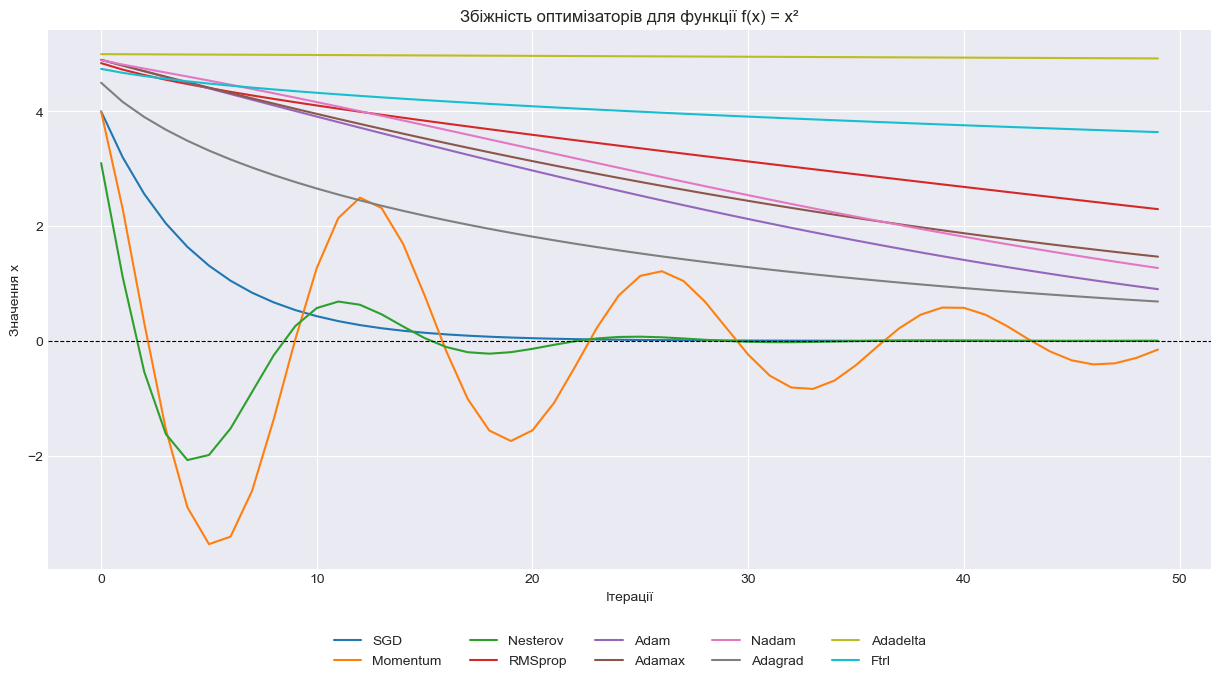

In [83]:
# Цільова функція та її аналітичний градієнт
def f(x):
    return x ** 2

# Основна конфігурація
initial_x = 5.0
steps = 50

# Перелік оптимізаторів із базовими параметрами
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.1),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.05, rho=0.9),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=0.1, beta_1=0.9, beta_2=0.999),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=0.1, beta_1=0.9, beta_2=0.999),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.5),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95),
    'Ftrl': tf.keras.optimizers.Ftrl(learning_rate=0.1, l1_regularization_strength=0.0),
}

# Якщо Lion, AdamW та інші доступні у вашій версії TensorFlow:
try:
    optimizers.update({
        'AdamW': tf.keras.optimizers.AdamW(learning_rate=0.1, weight_decay=1e-4),
        'Lion': tf.keras.optimizers.legacy.Lion(learning_rate=0.1),
    })
except AttributeError:
    print("Деякі оптимізатори не підтримуються у вашій версії TensorFlow.")

# Зберігаємо історію зміни параметру для кожного оптимізатора
histories = {}

for name, optimizer in optimizers.items():
    x = tf.Variable(initial_x, dtype=tf.float32)
    history = []

    for step in range(steps):
        with tf.GradientTape() as tape:
            loss = f(x)
        grad = tape.gradient(loss, x)
        optimizer.apply_gradients([(grad, x)])
        history.append(x.numpy())

    histories[name] = history

# Візуалізація результатів
plt.figure(figsize=(15, 7))

for name, history in histories.items():
    plt.plot(history, label=name)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Ітерації')
plt.ylabel('Значення x')
plt.title('Збіжність оптимізаторів для функції f(x) = x²')
plt.legend(bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=len(optimizers)/2)
plt.show()


# Losses

## 📉 Категорії втрат

| Категорія                              | Призначення                                                | Основні приклади                                   | Коли використовують                                          | Аналогія                                                  |
|----------------------------------------|-------------------------------------------------------------|---------------------------------------------------|-------------------------------------------------------------|----------------------------------------------------------|
| **Регресійні**                         | Вимірюють відхилення між передбаченим і фактичним значенням | MeanSquaredError, MeanAbsoluteError, Huber        | Для прогнозування числових значень                          | Вимірювання відстані між точками                         |
| **Класифікаційні (log-орієнтовані)**   | Оцінюють розбіжність між розподілами ймовірностей           | BinaryCrossentropy, CategoricalCrossentropy       | Для задач класифікації: бінарної або багатокласової       | Наскільки передбачення близьке до істини                |
| **Рангові / Ранжування**               | Вимірюють коректність порядку елементів                     | Hinge, SquaredHinge, Poisson                      | Задачі ранжування, пошук релевантності                     | Визначення правильного порядку елементів                |
| **Спеціалізовані / Статистичні**       | Специфічні метрики для розподілів або просторової схожості  | KLDivergence, CosineSimilarity                    | Для задач зі статистичними відмінностями або подібністю    | Вимірювання відмінностей між розподілами або напрямками |


In [ ]:
losses_list = dir(tf.keras.losses)

losses_classes = [
    name for name in losses_list
    if inspect.isclass(getattr(tf.keras.losses, name))
    and issubclass(getattr(tf.keras.losses, name), tf.keras.losses.Loss)
]
print(f'=== All Losses ({len(losses_classes)}) ===:')
for index, cls in enumerate(sorted(losses_classes)):
    print(f'{index}. {cls}')


=== All Losses (22) ===:
0. BinaryCrossentropy
1. BinaryFocalCrossentropy
2. CTC
3. CategoricalCrossentropy
4. CategoricalFocalCrossentropy
5. CategoricalHinge
6. Circle
7. CosineSimilarity
8. Dice
9. Hinge
10. Huber
11. KLDivergence
12. LogCosh
13. Loss
14. MeanAbsoluteError
15. MeanAbsolutePercentageError
16. MeanSquaredError
17. MeanSquaredLogarithmicError
18. Poisson
19. SparseCategoricalCrossentropy
20. SquaredHinge
21. Tversky


## 📉 Повний перелік функцій втрат (`tf.keras.losses`)

---

### Регресійні функції втрат

| Функція втрат               | Імпорт                              | Призначення                                    | Основні параметри              | Коли використовують                             | Аналогія                                            |
|----------------------------|------------------------------------|-----------------------------------------------|-------------------------------|------------------------------------------------|----------------------------------------------------|
| MeanSquaredError            | `tf.keras.losses.MeanSquaredError` | Середній квадрат похибки                       | `reduction`, `name`            | Задачі регресії, коли важливі великі відхилення | Середня квадратна відстань між точками             |
| MeanAbsoluteError           | `tf.keras.losses.MeanAbsoluteError`| Середнє абсолютне відхилення                    | `reduction`, `name`            | Коли потрібно зменшити вплив викидів             | Середня відстань між точками                         |
| MeanAbsolutePercentageError | `tf.keras.losses.MeanAbsolutePercentageError` | Відсоткова похибка                             | `reduction`, `name`            | Задачі, де важливий відсотковий розкид          | Відсоткове відхилення                                |
| MeanSquaredLogarithmicError | `tf.keras.losses.MeanSquaredLogarithmicError` | Квадрат різниці логарифмів                      | `reduction`, `name`            | Коли важливі відносні помилки                     | Квадратна помилка у лог-просторі                      |
| Huber                      | `tf.keras.losses.Huber`             | Поєднує MSE та MAE, стійка до викидів          | `delta`, `reduction`, `name`   | Коли дані з викидами                             | Амортизований квадратний штраф                       |
| LogCosh                    | `tf.keras.losses.LogCosh`           | М'яка квадратична помилка, гладша за MSE       | `reduction`, `name`            | Альтернатива Huber                               | Легше оптимізується, ніж MSE                          |
| MeanPoissonError           | `tf.keras.losses.MeanPoissonError`  | Середня помилка для Poisson-моделей             | `reduction`                   | Моделювання лічильних даних                       | Середнє відхилення Poisson-моделі                    |
| Poisson                    | `tf.keras.losses.Poisson`            | Для моделей із Poisson-розподілом               | `reduction`                   | Моделювання лічильних подій                        | Модель ймовірності подій                             |
| LogPoisson                 | `tf.keras.losses.LogPoisson`          | Логарифмічна Poisson-втрата                      | `reduction`                   | Моделювання лічильних подій з логарифмічною трансформацією | Логарифмічна версія Poisson-втрати                   |

---

### Класифікаційні функції втрат (логарифмічні)

| Функція втрат                   | Імпорт                                    | Призначення                                          | Основні параметри                         | Коли використовують                             | Аналогія                                                  |
|--------------------------------|-------------------------------------------|-----------------------------------------------------|------------------------------------------|------------------------------------------------|----------------------------------------------------------|
| BinaryCrossentropy             | `tf.keras.losses.BinaryCrossentropy`      | Для бінарної класифікації                              | `from_logits`, `label_smoothing`, `reduction` | Бінарна класифікація                             | Перевірка ймовірності класу                               |
| CategoricalCrossentropy        | `tf.keras.losses.CategoricalCrossentropy` | Для багатокласової класифікації (one-hot мітки)       | `from_logits`, `label_smoothing`, `reduction` | Багатокласова класифікація                        | Розбіжність між розподілами ймовірностей                  |
| SparseCategoricalCrossentropy  | `tf.keras.losses.SparseCategoricalCrossentropy` | Для багатокласової класифікації (індекси класів)      | `from_logits`, `reduction`               | Коли мітки — індекси класів (без one-hot)       | Спрощена версія CategoricalCrossentropy                    |
| BinaryCrossentropyWithLogits   | `tf.keras.losses.BinaryCrossentropy`       | Як BinaryCrossentropy, але приймає логіти              | `from_logits=True`                        | Коли модель повертає логіти для бінарної класифікації  | Втрати для логітів бінарної класифікації                   |
| CategoricalCrossentropyWithLogits | `tf.keras.losses.CategoricalCrossentropy` | Як CategoricalCrossentropy, але приймає логіти         | `from_logits=True`                        | Коли модель повертає логіти для багатокласової класифікації | Втрати для логітів багатокласової класифікації            |
| HuberCrossentropy             | `tf.keras.losses.HuberCrossentropy`        | Поєднує властивості Huber та Crossentropy             | `delta`, `from_logits`, `reduction`, `name` | Спеціальні задачі з гібридними втратами              | Комбінування стійкості Huber з логарифмічною втратою      |

---

### Рангові / Ранжування

| Функція втрат   | Імпорт                      | Призначення                                  | Основні параметри  | Коли використовують                   | Аналогія                                  |
|-----------------|-----------------------------|---------------------------------------------|-------------------|------------------------------------|------------------------------------------|
| Hinge           | `tf.keras.losses.Hinge`      | Для задач бінарної класифікації (SVM-подібних) | `reduction`       | Бінарна класифікація з максимальним зазором | Перевірка правильності класів            |
| SquaredHinge    | `tf.keras.losses.SquaredHinge` | Як Hinge, але з квадратом помилки           | `reduction`       | Коли хочуть сильніше карати помилки | Більш суворий штраф за помилки           |
| CategoricalHinge | `tf.keras.losses.CategoricalHinge` | Розширення Hinge для багатокласових задач  | `reduction`       | Багатокласова класифікація           | Перевірка правильності класів у багатокласових задачах |

---

### Спеціалізовані / Статистичні

| Функція втрат     | Імпорт                      | Призначення                                   | Основні параметри  | Коли використовують                   | Аналогія                                  |
|-------------------|-----------------------------|----------------------------------------------|-------------------|------------------------------------|------------------------------------------|
| KLDivergence      | `tf.keras.losses.KLDivergence` | Вимірює розбіжність між двома розподілами   | `reduction`       | Для задач оцінки розподілів          | Відстань між ймовірнісними розподілами  |
| CosineSimilarity  | `tf.keras.losses.CosineSimilarity` | Вимірює кутову схожість між векторами        | `axis`            | Для задач зі схожістю векторів       | Вимірювання кута між напрямками          |


# **Metrics**

## Категорії метрик TensorFlow Keras

| Категорія               | Призначення                                              | Основні приклади метрик                                   | Коли використовують                                       | Аналогія / Пояснення                                    |
|------------------------|---------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|---------------------------------------------------------|
| Загальні класифікаційні | Оцінка точності та якості класифікаційних моделей        | Accuracy, BinaryAccuracy, CategoricalAccuracy, TopKCategoricalAccuracy | Для оцінки загальної точності класифікаторів             | Відсоток правильних відповідей                          |
| Метрики для регресії    | Вимірювання похибок у задачах прогнозування числових значень | MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError | Для контролю якості прогнозів регресійних моделей        | Відстань між прогнозом і реальним значенням             |
| Метрики для бінарної класифікації | Вимірювання якості передбачень для двокласових задач         | Precision, Recall, AUC, TruePositives, TrueNegatives     | Коли важливі різні аспекти точності, як помилки першого/другого роду | Точність і повнота у визначенні позитивних випадків    |
| Метрики для багатокласової класифікації | Оцінка точності багатокласових моделей                      | SparseCategoricalAccuracy, CategoricalAccuracy, TopKCategoricalAccuracy | Для багатокласових задач, включно з ієрархічними        | Визначення правильності класифікації серед багатьох класів |
| Метрики для ранжування (рангові) | Вимірювання якості ранжування та порядку прогнозів            | MeanAveragePrecision, MeanIoU                              | Для задач пошуку, рекомендацій, сегментації               | Наскільки добре модель розставляє пріоритети            |
| Спеціалізовані метрики  | Для специфічних типів задач або метрик із нетиповою логікою | CosineSimilarity, CategoricalCrossentropy, KLDivergence   | Коли потрібні нетривіальні метрики для конкретних задач   | Вимірювання відмінностей, кутів, розподілів              |


In [ ]:
metric_list = dir(tf.keras.metrics)

metric_classes = [
    name for name in metric_list
    if inspect.isclass(getattr(tf.keras.metrics, name))
    and issubclass(getattr(tf.keras.metrics, name), tf.keras.metrics.Metric)
]
print(f'=== All Metrics ({len(metric_classes)}) ===:')
for index, cls in enumerate(sorted(metric_classes)):
    print(f'{index}. {cls}')


=== All Metrics (46) ===:
0. AUC
1. Accuracy
2. BinaryAccuracy
3. BinaryCrossentropy
4. BinaryIoU
5. CategoricalAccuracy
6. CategoricalCrossentropy
7. CategoricalHinge
8. ConcordanceCorrelation
9. CosineSimilarity
10. F1Score
11. FBetaScore
12. FalseNegatives
13. FalsePositives
14. Hinge
15. IoU
16. KLDivergence
17. LogCoshError
18. Mean
19. MeanAbsoluteError
20. MeanAbsolutePercentageError
21. MeanIoU
22. MeanMetricWrapper
23. MeanSquaredError
24. MeanSquaredLogarithmicError
25. Metric
26. OneHotIoU
27. OneHotMeanIoU
28. PearsonCorrelation
29. Poisson
30. Precision
31. PrecisionAtRecall
32. R2Score
33. Recall
34. RecallAtPrecision
35. RootMeanSquaredError
36. SensitivityAtSpecificity
37. SparseCategoricalAccuracy
38. SparseCategoricalCrossentropy
39. SparseTopKCategoricalAccuracy
40. SpecificityAtSensitivity
41. SquaredHinge
42. Sum
43. TopKCategoricalAccuracy
44. TrueNegatives
45. TruePositives


## Повний перелік метрик tf.keras.metrics

---

### 1 Загальні класифікаційні метрики  
| Метрика                  | Імпорт                            | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|--------------------------|----------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| Accuracy                 | `tf.keras.metrics.Accuracy`      | Відсоток правильних передбачень                | `name`, `dtype`                | Загальна оцінка якості класифікатора             | Частка правильних передбачень                       |  
| BinaryAccuracy           | `tf.keras.metrics.BinaryAccuracy`| Точність бінарної класифікації                  | `threshold=0.5`, `name`        | Бінарні класифікації                             | Частка правильних передбачень для двокласових задач|  
| CategoricalAccuracy      | `tf.keras.metrics.CategoricalAccuracy`| Точність багатокласової класифікації (one-hot) | `name`, `dtype`                | Багатокласова класифікація з one-hot мітками     | Частка правильних передбачень                      |  
| SparseCategoricalAccuracy| `tf.keras.metrics.SparseCategoricalAccuracy`| Точність багатокласової класифікації (індекси класів) | `name`, `dtype`                | Багатокласова класифікація з індексними мітками  | Як CategoricalAccuracy, але для індексів класів    |  
| TopKCategoricalAccuracy  | `tf.keras.metrics.TopKCategoricalAccuracy`| Перевірка, чи є правильний клас у топ-K       | `k=5`, `name`                  | Багатокласові задачі з багатьма класами           | Чи входить правильний клас у топ-K прогнозів        |  

---

### 2 Метрики для регресії  
| Метрика                    | Імпорт                            | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|----------------------------|----------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| MeanSquaredError           | `tf.keras.metrics.MeanSquaredError` | Середній квадрат похибки                       | `name`, `dtype`                | Регресійні задачі, коли важливі великі помилки  | Середнє квадратне відхилення                         |  
| MeanAbsoluteError          | `tf.keras.metrics.MeanAbsoluteError` | Середнє абсолютне відхилення                   | `name`, `dtype`                | Регресійні задачі, стійкість до викидів         | Середня абсолютна помилка                            |  
| MeanAbsolutePercentageError| `tf.keras.metrics.MeanAbsolutePercentageError` | Відсоткова похибка                             | `name`, `dtype`                | Регресія, коли важливі відносні помилки          | Відсоткове відхилення                                |  
| RootMeanSquaredError       | `tf.keras.metrics.RootMeanSquaredError` | Корінь середнього квадрату похибки             | `name`, `dtype`                | Регресія, інтерпретованість похибки у тих же одиницях | Квадратний корінь MSE                                |  

---

### 3 Метрики для бінарної класифікації  
| Метрика                  | Імпорт                            | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|--------------------------|----------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| Precision                | `tf.keras.metrics.Precision`     | Частка істинно позитивних серед усіх позитивних передбачень | `name`, `dtype`                | Важливо мінімізувати хибнопозитивні помилки    | Наскільки точно модель передбачає позитивний клас |  
| Recall                   | `tf.keras.metrics.Recall`        | Частка істинно позитивних серед усіх фактичних позитивів | `name`, `dtype`                | Важливо не пропустити позитивні випадки         | Наскільки модель виявляє всі позитиви             |  
| AUC                      | `tf.keras.metrics.AUC`           | Площа під ROC-кривою                           | `num_thresholds`, `curve`, `name` | Оцінка якості класифікатора                      | Міра роздільної здатності моделі                    |  
| TruePositives            | `tf.keras.metrics.TruePositives` | Кількість істинно позитивних                   | `name`                        | Детальний аналіз результатів                     | Прямий підрахунок правильних позитивів             |  
| TrueNegatives            | `tf.keras.metrics.TrueNegatives` | Кількість істинно негативних                   | `name`                        | Аналіз результатів                               | Прямий підрахунок правильних негативів             |  
| FalsePositives           | `tf.keras.metrics.FalsePositives`| Кількість хибнопозитивних                       | `name`                        | Аналіз помилок                                  | Кількість помилково визначених позитивів           |  
| FalseNegatives           | `tf.keras.metrics.FalseNegatives`| Кількість хибнонегативних                       | `name`                        | Аналіз помилок                                  | Кількість пропущених позитивів                      |  

---

### 4 Метрики для багатокласової класифікації  
| Метрика                    | Імпорт                                | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|----------------------------|--------------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| SparseCategoricalAccuracy   | `tf.keras.metrics.SparseCategoricalAccuracy` | Точність для багатокласових задач з індексами класів | `name`, `dtype`                | Багатокласова класифікація з індексними мітками | Як CategoricalAccuracy, але для індексних класів    |  
| CategoricalAccuracy        | `tf.keras.metrics.CategoricalAccuracy` | Точність для багатокласових задач з one-hot мітками | `name`, `dtype`                | Багатокласова класифікація з one-hot мітками     | Частка правильних передбачень                      |  
| TopKCategoricalAccuracy    | `tf.keras.metrics.TopKCategoricalAccuracy` | Перевірка, чи є правильний клас у топ-K       | `k=5`, `name`                  | Багатокласові задачі з великою кількістю класів   | Чи входить правильний клас у топ-K прогнозів        |  

---

### 5 Метрики ранжування та сегментації  
| Метрика                    | Імпорт                              | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|----------------------------|------------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| MeanIoU                   | `tf.keras.metrics.MeanIoU`          | Середній індекс Жаккара (перекриття)          | `num_classes`                  | Оцінка якості сегментації                      | Відношення площі перетину до площі об’єднання      |  
| MeanAveragePrecision      | `tf.keras.metrics.MeanAveragePrecision` | Середнє значення точності (AP)                 | `num_thresholds`, `class_id`  | Оцінка якості ранжування, детекції об’єктів    | Середня точність під різними порогами               |  

---

### 6 Спеціалізовані метрики  
| Метрика                    | Імпорт                              | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|----------------------------|------------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| CosineSimilarity          | `tf.keras.metrics.CosineSimilarity`| Вимірювання кутової схожості між векторами     | `axis`                        | Метрики для подібності векторів                 | Кут між двома векторами                             |  
| KLDivergence              | `tf.keras.metrics.KLDivergence`    | Відстань Кульбака-Лейблера між розподілами    | `reduction`                   | Порівняння ймовірнісних розподілів              | Відстань між двома розподілами                      |  
| CategoricalCrossentropy   | `tf.keras.metrics.CategoricalCrossentropy` | Логарифмічна втрата для багатокласової класифікації | `from_logits`, `label_smoothing` | Задачі класифікації                             | Розбіжність між прогнозованим і істинним розподілом|  
| SparseCategoricalCrossentropy | `tf.keras.metrics.SparseCategoricalCrossentropy` | Логарифмічна втрата для індексної багатокласової класифікації | `from_logits`                 | Класифікація з індексними мітками                | Аналог CategoricalCrossentropy                      |  

---

### 7 Метрики для відстеження окремих подій  
| Метрика                    | Імпорт                              | Призначення                                    | Основні параметри               | Коли використовують                             | Аналогія / Пояснення                                |  
|----------------------------|------------------------------------|-----------------------------------------------|--------------------------------|------------------------------------------------|----------------------------------------------------|  
| TruePositives             | `tf.keras.metrics.TruePositives`   | Лічильник істинно позитивних                   | `name`                        | Аналіз якості прогнозів                         | Кількість правильних позитивних                      |  
| TrueNegatives             | `tf.keras.metrics.TrueNegatives`   | Лічильник істинно негативних                   | `name`                        | Аналіз якості прогнозів                         | Кількість правильних негативних                      |  
| FalsePositives            | `tf.keras.metrics.FalsePositives`  | Лічильник хибнопозитивних                      | `name`                        | Аналіз помилок                                 | Кількість помилкових позитивних                       |  
| FalseNegatives            | `tf.keras.metrics.FalseNegatives`  | Лічильник хибнонегативних                      | `name`                        | Аналіз помилок                                 | Кількість пропущених позитивних                       |  

---


# **Callbacks**

## Категорії Callback-ів

| Категорія                 | Призначення                                              | Основні приклади callback-ів                      | Коли використовують                              | Аналогія / Пояснення                                    |
|---------------------------|---------------------------------------------------------|--------------------------------------------------|-------------------------------------------------|---------------------------------------------------------|
| Контроль навчання         | Керування процесом навчання (збереження, зупинка, lr)    | ModelCheckpoint, EarlyStopping, ReduceLROnPlateau | Щоб зупинити вчасно, зберегти кращі ваги, адаптувати lr | Як “автосейв” і “автостоп” у грі, адаптація швидкості   |
| Логування і моніторинг     | Запис результатів, візуалізація, інтеграція з системами  | TensorBoard, CSVLogger, LambdaCallback            | Для аналізу, візуалізації, кастомних дій під час тренування | Ведення щоденника або стрімінг даних                     |
| Підтримка та кастомізація  | Розширення логіки навчання, кастомні дії, збереження стану| Callback, LambdaCallback, TerminateOnNaN           | Для складних сценаріїв навчання та контролю        | Плагіни або скрипти, що додають функціонал               |

In [ ]:
callbacks_list = dir(tf.keras.callbacks)

callback_classes = [
    name for name in callbacks_list
    if inspect.isclass(getattr(tf.keras.callbacks, name))
    and issubclass(getattr(tf.keras.callbacks, name), tf.keras.callbacks.Callback)
]
print(f'=== All Callbacks ({len(callback_classes)}) ===:')
for index, cls in enumerate(sorted(callback_classes)):
    print(f'{index}. {cls}')


=== All Callbacks (15) ===:
0. BackupAndRestore
1. CSVLogger
2. Callback
3. CallbackList
4. EarlyStopping
5. History
6. LambdaCallback
7. LearningRateScheduler
8. ModelCheckpoint
9. ProgbarLogger
10. ReduceLROnPlateau
11. RemoteMonitor
12. SwapEMAWeights
13. TensorBoard
14. TerminateOnNaN


## 1. Контроль навчання

| Callback              | Імпорт                         | Призначення                                              | Основні параметри                         | Коли використовують                         | Аналогія / Пояснення                                  |  
|-----------------------|--------------------------------|---------------------------------------------------------|------------------------------------------|--------------------------------------------|------------------------------------------------------|  
| ModelCheckpoint       | `tf.keras.callbacks.ModelCheckpoint` | Зберігає модель або ваги під час тренування              | `filepath`, `monitor`, `save_best_only` | Щоб зберегти найкращу модель за метрикою    | Автосейв прогресу, щоб не втратити результат         |  
| EarlyStopping         | `tf.keras.callbacks.EarlyStopping` | Автоматично припиняє тренування, якщо метрика не покращується | `monitor`, `patience`, `min_delta`       | Щоб уникнути перенавчання                   | Автостоп, щоб зупинити тренування без прогресу        |  
| ReduceLROnPlateau     | `tf.keras.callbacks.ReduceLROnPlateau` | Зменшує швидкість навчання, якщо метрика стабілізується   | `monitor`, `factor`, `patience`          | Для стабілізації навчання                   | Плавне гальмування навчання, щоб уникнути переобучення|  


## 2. Логування і моніторинг

| Callback              | Імпорт                         | Призначення                                              | Основні параметри                         | Коли використовують                         | Аналогія / Пояснення                                  |  
|-----------------------|--------------------------------|---------------------------------------------------------|------------------------------------------|--------------------------------------------|------------------------------------------------------|  
| TensorBoard           | `tf.keras.callbacks.TensorBoard` | Логування для TensorBoard, візуалізація метрик           | `log_dir`, `histogram_freq`              | Для візуального аналізу навчання           | Відеоігровий стрім із показом статистики              |  
| CSVLogger             | `tf.keras.callbacks.CSVLogger` | Запис результатів у CSV-файл                              | `filename`, `separator`                   | Щоб зберегти лог у таблицю                  | Щоденник у вигляді таблиці                             |  
| LambdaCallback        | `tf.keras.callbacks.LambdaCallback` | Кастомні дії на етапах тренування                        | `on_epoch_end`, `on_batch_end`            | Для швидкого створення простих callback-ів | Швидкий скрипт або тригер                              |  


## 3. Підтримка і кастомізація

| Callback              | Імпорт                         | Призначення                                              | Основні параметри                         | Коли використовують                         | Аналогія / Пояснення                                  |  
|-----------------------|--------------------------------|---------------------------------------------------------|------------------------------------------|--------------------------------------------|------------------------------------------------------|  
| Callback              | `tf.keras.callbacks.Callback` | Базовий клас для створення кастомних callback-ів       | Методи `on_epoch_end`, `on_train_batch_end` і ін. | Для створення власних логік                   | Каркас для написання власних плагінів                  |  
| TerminateOnNaN        | `tf.keras.callbacks.TerminateOnNaN` | Зупиняє тренування, якщо з’являються NaN у метриках      | -                                        | Для безпеки тренування                      | Автоматичне аварійне завершення при некоректних значеннях|  


# **Activations**

## Категорії активаційних функцій

| Категорія                | Призначення                               | Основні приклади                         | Коли використовують                       | Аналогія / Пояснення                                   |
|--------------------------|------------------------------------------|-----------------------------------------|------------------------------------------|-------------------------------------------------------|
| Лінійні та порогові      | Просте лінійне відображення або поріг   | linear, relu, hard_sigmoid               | Основні шари, швидкі обчислення          | Вмикач зі звичайним або різким вмиканням               |
| Сигмоїдні                | Стискають вхід до (0,1) або (-1,1)      | sigmoid, tanh, hard_sigmoid, elu, selu  | Класифікація, RNN, стабілізація          | Плавний регулятор інтенсивності                         |
| Плавні та гнучкі          | Покращують навчання за рахунок гладкості| swish, softplus, softsign, gelu          | Глибокі мережі, складні архітектури      | Гнучкий вмикач із адаптивною яскравістю               |
| Спеціалізовані            | Для специфічних потреб або оптимізації   | exponential, linear, relu6, mish          | Оптимізація, нові архітектури             | Інноваційні або прискорені функції                      |

In [69]:
activations_list = dir(tf.keras.activations)

activation_functions = [
    name for name in activations_list
    if callable(getattr(tf.keras.activations, name))
    and not name.startswith("_")
]

print(f'All activations ({len(activation_functions)}):')
for index, func in enumerate(sorted(activation_functions)):
    print(f'{index}. {func.capitalize()}')


All activations (34):
0. Celu
1. Deserialize
2. Elu
3. Exponential
4. Gelu
5. Get
6. Glu
7. Hard_shrink
8. Hard_sigmoid
9. Hard_silu
10. Hard_swish
11. Hard_tanh
12. Leaky_relu
13. Linear
14. Log_sigmoid
15. Log_softmax
16. Mish
17. Relu
18. Relu6
19. Selu
20. Serialize
21. Sigmoid
22. Silu
23. Soft_shrink
24. Softmax
25. Softplus
26. Softsign
27. Sparse_plus
28. Sparsemax
29. Squareplus
30. Swish
31. Tanh
32. Tanh_shrink
33. Threshold


### 1. Лінійні та порогові активації
| Активація       | Імпорт                          | Призначення                                  | Основні параметри                  | Коли використовують                           | Аналогія / Пояснення                                |
|-----------------|--------------------------------|---------------------------------------------|----------------------------------|----------------------------------------------|----------------------------------------------------|
| linear          | `tf.keras.activations.linear`  | Лінійна функція (x)                          | -                                | Вихідні шари регресії                        | Прямий провід без змін                               |
| relu            | `tf.keras.activations.relu`    | Прямий перехід зі зрізом на 0                | `max_value=None`, `negative_slope=0`, `threshold=0` | Широко у CNN, MLP                              | Вмикач світла, що відсікає негативні значення       |
| hard_sigmoid    | `tf.keras.activations.hard_sigmoid` | Аппроксимація sigmoid швидка у обчисленнях | -                                | Мобільні та вбудовані моделі                  | Спрощений плавний вмикач                             |
| relu6           | `tf.keras.activations.relu6`   | ReLU зі зрізом зверху в 6                     | -                                | Мобільні моделі                               | Вмикач зі "стелею" у 6                              |


### 2. Сигмоїдні активації

| Активація       | Імпорт                          | Призначення                                  | Основні параметри                  | Коли використовують                           | Аналогія / Пояснення                                |
|-----------------|--------------------------------|---------------------------------------------|----------------------------------|----------------------------------------------|----------------------------------------------------|
| sigmoid         | `tf.keras.activations.sigmoid` | Відображення в діапазон (0,1)                | -                                | Вихідні шари бінарної класифікації            | Плавний регулятор інтенсивності                      |
| tanh            | `tf.keras.activations.tanh`    | Відображення в діапазон (-1,1)                | -                                | RNN, де потрібен від’ємний діапазон           | Гойдалка, що має позитивні і негативні значення     |
| elu             | `tf.keras.activations.elu`     | Exponential Linear Unit                      | `alpha=1.0`                     | Стабілізація тренування                        | Вмикач зі слабким "світлом" у негативній зоні       |
| selu            | `tf.keras.activations.selu`    | Самонормуюча активація                       | -                                | Глибокі нейромережі з самонормалізацією        | Автоматичний регулятор яскравості                   |
| hard_sigmoid    | `tf.keras.activations.hard_sigmoid` | Аппроксимація sigmoid                        | -                                | Мобільні, прості моделі                        | Спрощений плавний вмикач                             |


### 3. Плавні та гнучкі активації

| Активація       | Імпорт                          | Призначення                                  | Основні параметри                  | Коли використовують                           | Аналогія / Пояснення                                |
|-----------------|--------------------------------|---------------------------------------------|----------------------------------|----------------------------------------------|----------------------------------------------------|
| swish           | `tf.keras.activations.swish`  | x * sigmoid(x), гладка нелінійність          | -                                | Альтернатива ReLU                              | Світло, що адаптивно змінює яскравість              |
| softplus        | `tf.keras.activations.softplus`| Логарифмічна функція, гладка альтернатива ReLU| -                               | Глибокі мережі, стабільність                  | М’який поріг для вмикання                           |
| softsign        | `tf.keras.activations.softsign`| Нормалізує вхід в межах (-1,1)               | -                                | Альтернатива tanh                              | Плавний регулятор з обмеженням                      |
| gelu            | `tf.keras.activations.gelu`   | Gaussian Error Linear Unit                   | -                                | Сучасні трансформери, NLP                       | Складний плавний поріг із статистичною інтерпретацією |
| mish            | `tf.keras.activations.mish`   | Гладка нелінійність, подібна swish           | -                                | Нові архітектури                               | Плавний вмикач з більшою гладкістю                  |


### 4. Спеціалізовані активації

| Активація       | Імпорт                          | Призначення                                  | Основні параметри                  | Коли використовують                           | Аналогія / Пояснення                                |
|-----------------|--------------------------------|---------------------------------------------|----------------------------------|----------------------------------------------|----------------------------------------------------|
| exponential     | `tf.keras.activations.exponential` | Експоненціальна функція                      | -                                | Специфічні моделі, RNN                        | Приріст, що зростає експоненціально                  |
| softmax         | `tf.keras.activations.softmax`| Перетворює вектор у ймовірності              | `axis=-1`                        | Вихідні шари багатокласової класифікації      | Вибір одного з кількох варіантів                     |
| linear          | `tf.keras.activations.linear`  | Лінійне відображення                         | -                                | Вихідні шари регресії                          | Прямий провід без змін                               |


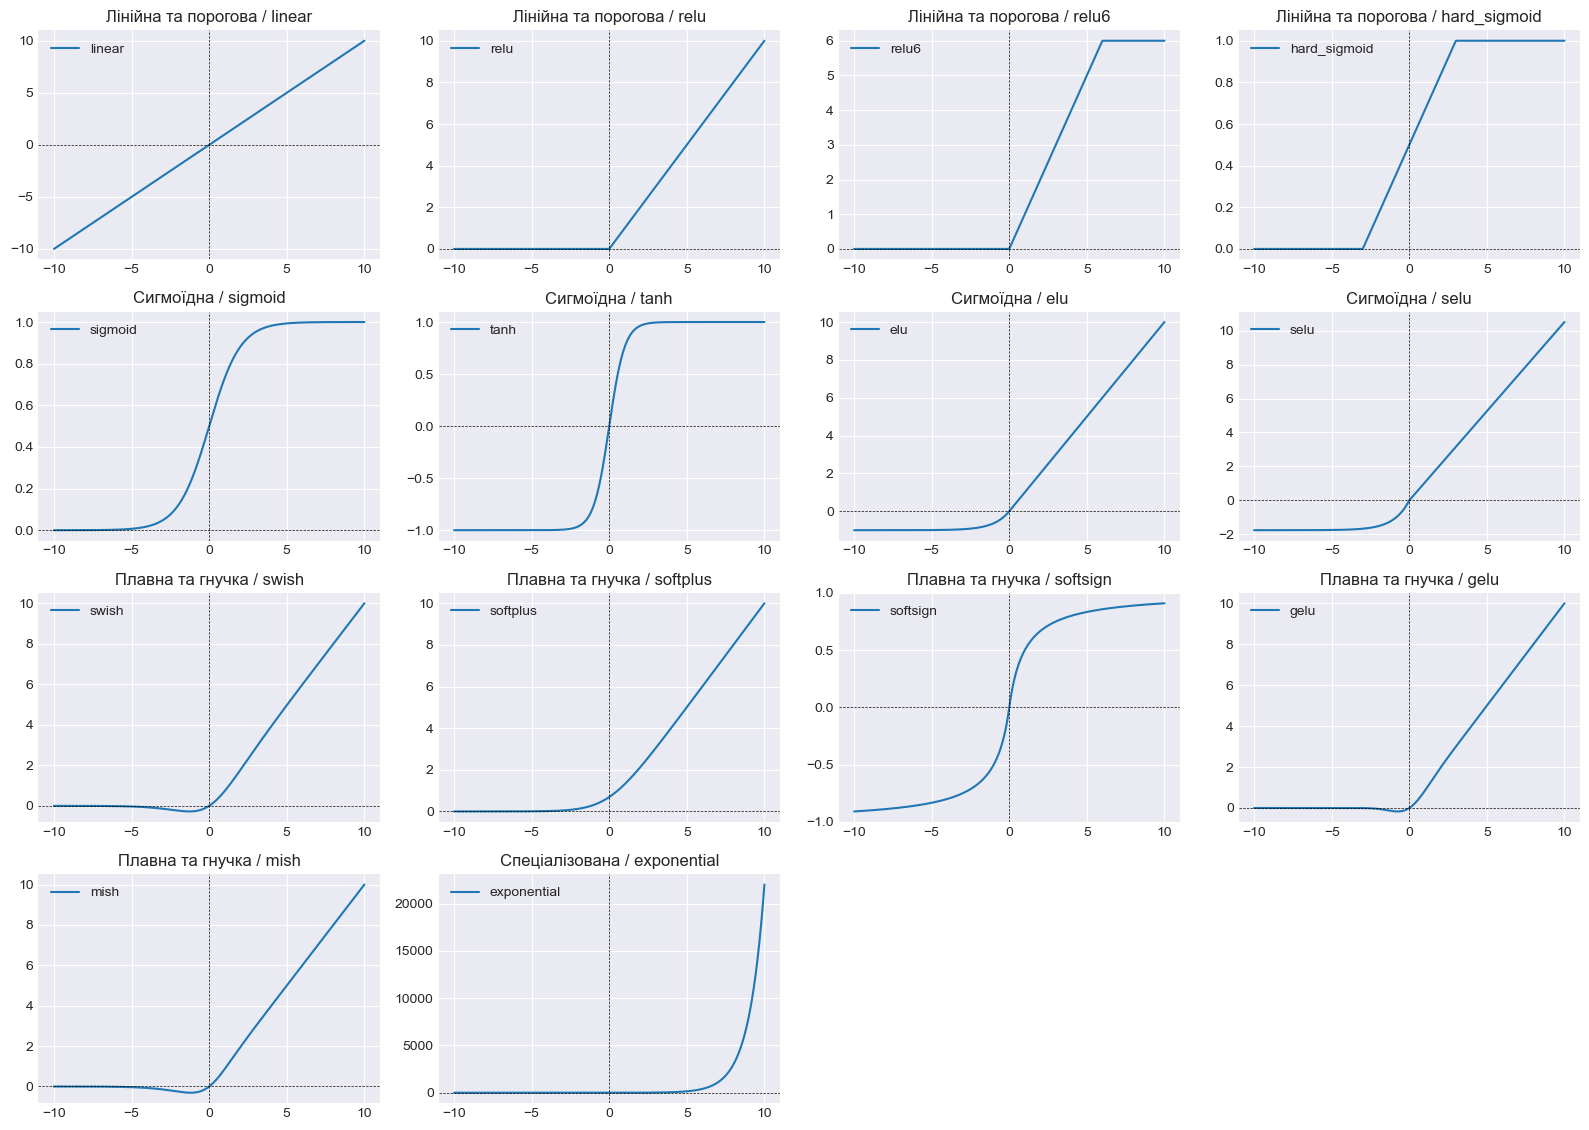

In [119]:
# Діапазон вхідних значень
x = np.linspace(-10, 10, 500)

# Словник категорій та відповідних активацій
activation_categories = {
    "Лінійна та порогова": ['linear', 'relu', 'relu6', 'hard_sigmoid'],
    "Сигмоїдна": ['sigmoid', 'tanh', 'elu', 'selu'],
    "Плавна та гнучка": ['swish', 'softplus', 'softsign', 'gelu', 'mish'],
    "Спеціалізована": ['exponential']
}

# Параметри сітки subplot
cols = 4
total_activations = sum(len(v) for v in activation_categories.values())
rows = (total_activations + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axs = axs.flatten()

idx = 0
for category, acts in activation_categories.items():
    for act_name in acts:
        activation_fn = getattr(tf.keras.activations, act_name)
        y = activation_fn(tf.convert_to_tensor(x, dtype=tf.float32)).numpy()

        ax = axs[idx]
        ax.plot(x, y, color='tab:blue', label=act_name)
        ax.set_title(f'{category} / {act_name}')
        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
        ax.legend()
        idx += 1

# Приховати непотрібні субплоти, якщо вони є
for j in range(idx, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # залишаємо місце для заголовків
plt.show()
